# Import the required libraries and modules that you would need.

In [37]:
import pandas as pd
import numpy as np
import datetime
import warnings
import matplotlib.pyplot as plt
import seaborn as sns

from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import StandardScaler
import scipy.stats as stats
from sklearn import metrics
from sklearn.metrics import classification_report
from sklearn.tree import DecisionTreeRegressor
from imblearn.under_sampling import TomekLinks


import pickle

warnings.filterwarnings('ignore')

# Read that data into Python and call the dataframe `churnData`.

In [10]:
churnData = pd.read_csv('Customer-Churn.csv') 

In [11]:
churnData

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No,Yes,No,No,No,No,Month-to-month,29.85,29.85,No
1,Male,0,No,No,34,Yes,Yes,No,Yes,No,No,No,One year,56.95,1889.5,No
2,Male,0,No,No,2,Yes,Yes,Yes,No,No,No,No,Month-to-month,53.85,108.15,Yes
3,Male,0,No,No,45,No,Yes,No,Yes,Yes,No,No,One year,42.30,1840.75,No
4,Female,0,No,No,2,Yes,No,No,No,No,No,No,Month-to-month,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,Male,0,Yes,Yes,24,Yes,Yes,No,Yes,Yes,Yes,Yes,One year,84.80,1990.5,No
7039,Female,0,Yes,Yes,72,Yes,No,Yes,Yes,No,Yes,Yes,One year,103.20,7362.9,No
7040,Female,0,Yes,Yes,11,No,Yes,No,No,No,No,No,Month-to-month,29.60,346.45,No
7041,Male,1,Yes,No,4,Yes,No,No,No,No,No,No,Month-to-month,74.40,306.6,Yes


# Check the datatypes of all the columns in the data. You would see that the column `TotalCharges` is object type. Convert this column into numeric type using `pd.to_numeric` function.

In [12]:
churnData.dtypes

gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

In [13]:
churnData['TotalCharges'] = pd.to_numeric(churnData['TotalCharges'], errors='coerce')

In [14]:
churnData.dtypes

gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
MonthlyCharges      float64
TotalCharges        float64
Churn                object
dtype: object

# Check for null values in the dataframe. Replace the null values.

In [15]:
churnData.isna().sum()

gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

In [16]:
churnData['TotalCharges'].fillna(value=churnData['TotalCharges'].mean(), inplace=True)

In [17]:
churnData.isna().sum()

gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

# Use the following features: `tenure`, `SeniorCitizen`, `MonthlyCharges` and `TotalCharges`:

## Scale the features either by using normalizer or a standard scaler

In [18]:
data = churnData[['tenure', 'SeniorCitizen', 'MonthlyCharges', 'TotalCharges']].copy()

In [19]:
transformer = StandardScaler().fit(data)
x_standardized = transformer.transform(data)
x_standardized

array([[-1.27744458, -0.43991649, -1.16032292, -0.99497138],
       [ 0.06632742, -0.43991649, -0.25962894, -0.17387565],
       [-1.23672422, -0.43991649, -0.36266036, -0.96039939],
       ...,
       [-0.87024095, -0.43991649, -1.1686319 , -0.85518222],
       [-1.15528349,  2.27315869,  0.32033821, -0.87277729],
       [ 1.36937906, -0.43991649,  1.35896134,  2.01391739]])

## Split the data into a training set and a test set.

In [20]:
X = data
y = churnData['Churn']

In [21]:
X = pd.get_dummies(X)
X

,tenure,SeniorCitizen,MonthlyCharges,TotalCharges
0,1,0,29.85,29.85
1,34,0,56.95,1889.50
2,2,0,53.85,108.15
3,45,0,42.30,1840.75
4,2,0,70.70,151.65
...,...,...,...,...
7038,24,0,84.80,1990.50
7039,72,0,103.20,7362.90
7040,11,0,29.60,346.45
7041,4,1,74.40,306.60


In [22]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Upsamling with SMOTE

## Apply Upsampling with SMOTE

In [30]:
smote = SMOTE()
X_sm, y_sm = smote.fit_resample(X_train, y_train)
y_sm.value_counts()

No     4138
Yes    4138
Name: Churn, dtype: int64

## Logistic Regression Model 

In [31]:
classification = LogisticRegression(random_state=42, max_iter=10000)
classification.fit(X_sm, y_sm)

LogisticRegression(max_iter=10000, random_state=42)

In [32]:
classification.score(X_test, y_test)

0.7395315826827538

## Use decision tree classifier to fit the model and compute the accuracy of the model

In [ ]:
from sklearn.tree import DecisionTreeClassifier
X_train, X_test, y_train, y_test = train_test_split(X_sm, y_sm, test_size=0.33)
model = DecisionTreeClassifier()
model.fit(X_train, y_train)
model.score(X_test, y_test)

## Compare the accuracies of the two models

In [34]:
predictions = classification.predict(X_sm)
confusion_matrix(y_sm, predictions)

array([[2961, 1177],
       [1096, 3042]])

<AxesSubplot:>

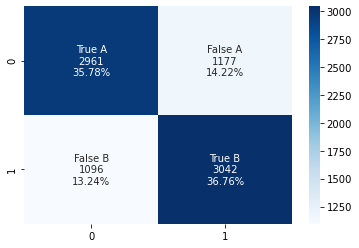

In [35]:
cf_matrix = confusion_matrix(y_sm, predictions)
group_names = ['True A', 'False A',
               'False B', 'True B']

group_counts = ["{0:0.0f}".format(value) for value in cf_matrix.flatten()]
group_percentages = ["{0:.2%}".format(value) for value in cf_matrix.flatten()/np.sum(cf_matrix)]
labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(cf_matrix, annot=labels, fmt='', cmap='Blues')

# Apply TomekLinks for downsampling

In [39]:
tomek = TomekLinks()
X_tl, y_tl = tomek.fit_resample(X_train, y_train)
y_tl.value_counts()

No     3673
Yes    1496
Name: Churn, dtype: int64

## Use logistic regression to fit the model and compute the accuracy of the model.

In [42]:
classification = LogisticRegression(random_state=42, max_iter=10000)
classification.fit(X_tl, y_tl)

LogisticRegression(max_iter=10000, random_state=42)

In [43]:
classification.score(X_test, y_test)

0.7913413768630234

## Use decision tree classifier to fit the model and compute the accuracy of the model.

In [44]:
X_train, X_test, y_train, y_test = train_test_split(X_tl, y_tl, test_size=0.33)
model = DecisionTreeClassifier()
model.fit(X_train, y_train)
model.score(X_test, y_test)

0.742672919109027

## Compare the accuracies of the two models. 

In [45]:
X_train, X_test, y_train, y_test = train_test_split(X_tl, y_tl, test_size=0.33)
model = DecisionTreeClassifier()
model.fit(X_train, y_train)
model.score(X_test, y_test)

0.7485345838218054

## Compare the accuracies of the two models.

In [47]:
predictions = classification.predict(X_tl)
confusion_matrix(y_tl, predictions)

array([[3296,  377],
       [ 718,  778]])

<AxesSubplot:>

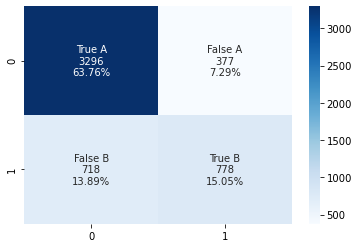

In [48]:
cf_matrix = confusion_matrix(y_tl, predictions)
group_names = ['True A', 'False A',
               'False B', 'True B']

group_counts = ["{0:0.0f}".format(value) for value in cf_matrix.flatten()]
group_percentages = ["{0:.2%}".format(value) for value in cf_matrix.flatten()/np.sum(cf_matrix)]
labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(cf_matrix, annot=labels, fmt='', cmap='Blues')